<a href="https://colab.research.google.com/github/dnlgnwn-wq/Prediksi-model-bmw_ANN/blob/main/Daniel_prediksi_mobil_bmw_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARY**

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier      # 🔹 GANTI KE ANN (MLP)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# **LOAD DATASET**

In [21]:
df = pd.read_csv("/content/bmw.csv", sep=';')
print("5 data teratas:")
display(df.head())

5 data teratas:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


# **CEK INFO DATASET**

In [22]:
print("\nInformasi dataset:")
df.info()
print("\nCek nilai kosong:")
print(df.isnull().sum())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB

Cek nilai kosong:
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


# **PRA-PEMROSESAN DATA**

In [23]:
df = df.dropna()

y = df['model']
X = df.drop(columns=['model'])

X = pd.get_dummies(X, drop_first=True)
print("\nFitur setelah encoding:")
display(X.head())


Fitur setelah encoding:


,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,11200,67068,125,57.6,2.0,False,False,False,False,False,False
1,2018,27000,14827,145,42.8,2.0,False,False,False,False,False,True
2,2016,16000,62794,160,51.4,3.0,False,False,False,False,False,False
3,2017,12750,26676,145,72.4,1.5,False,False,False,False,False,False
4,2014,14500,39554,160,50.4,3.0,False,False,False,False,False,False


# **SPLIT DATA**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **BUAT DAN LATIH MODEL ANN**

In [25]:
model = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # 🔹 Arsitektur ANN
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

start_time = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end_time = time.time()

# **EVALUASI MODEL ANN**

In [26]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"\nAkurasi Model ANN: {accuracy:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (angka):")
print(cm)


Akurasi Model ANN: 22.48%

Classification Report:
              precision    recall  f1-score   support

    1 Series       0.00      0.00      0.00       374
    2 Series       0.00      0.00      0.00       232
    3 Series       0.22      1.00      0.37       485
    4 Series       0.00      0.00      0.00       207
    5 Series       0.00      0.00      0.00       211
    6 Series       0.00      0.00      0.00        19
    7 Series       0.00      0.00      0.00        26
    8 Series       0.00      0.00      0.00         6
          M2       0.00      0.00      0.00         6
          M3       0.00      0.00      0.00         5
          M4       0.00      0.00      0.00        27
          M5       0.00      0.00      0.00         7
          M6       0.00      0.00      0.00         4
          X1       0.00      0.00      0.00       170
          X2       0.00      0.00      0.00        59
          X3       0.00      0.00      0.00       123
          X4       0.00      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **VISUALISASI CONFUSION MATRIX**

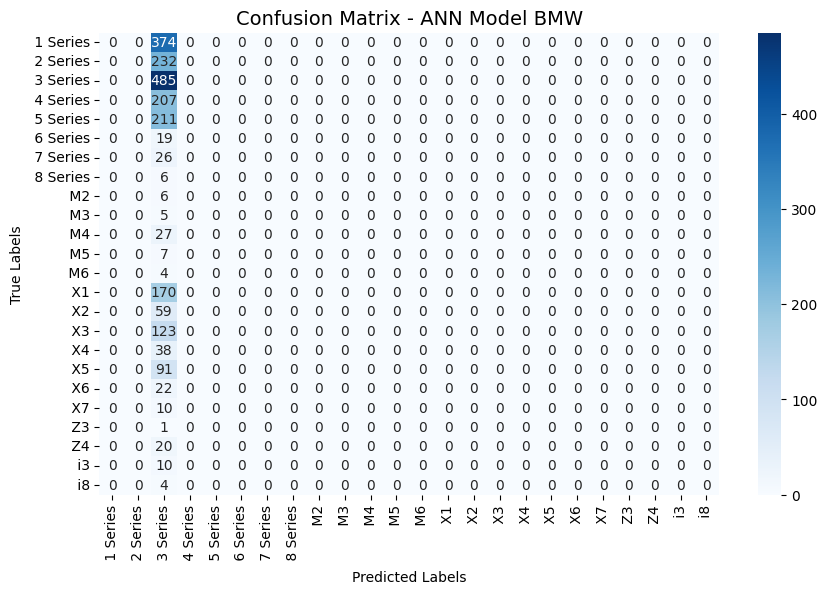

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - ANN Model BMW", fontsize=14)
plt.show()

# **INPUTAN DARI USER UNTUK PREDIKSI MODEL MOBIL BMW**

In [28]:
print("==== PREDIKSI MANUAL ====\n")

tahun = int(input("Masukkan tahun mobil: "))
harga = float(input("Masukkan harga mobil (£): "))
transmisi = input("Masukkan transmisi (Manual/Automatic/Semi-Auto): ").lower()
jarak_tempuh = float(input("Masukkan mileage: "))
bahan_bakar = input("Masukkan fuel type: ").lower()
pajak = float(input("Masukkan pajak (£): "))
konsumsi_bbm = float(input("Masukkan mpg: "))
ukuran_mesin = float(input("Masukkan engineSize: "))

user_input = pd.DataFrame({
    "year": [tahun],
    "price": [harga],
    "transmission": [transmisi],
    "mileage": [jarak_tempuh],
    "fuelType": [bahan_bakar],
    "tax": [pajak],
    "mpg": [konsumsi_bbm],
    "engineSize": [ukuran_mesin]
})

user_input = pd.get_dummies(user_input)
user_input = user_input.reindex(columns=X.columns, fill_value=0)

prediksi = model.predict(user_input)[0]
print(f"\nPrediksi Model Mobil BMW (ANN): {prediksi}")

==== PREDIKSI MANUAL ====

Masukkan tahun mobil: 2012
Masukkan harga mobil (£): 1300000
Masukkan transmisi (Manual/Automatic/Semi-Auto): manual
Masukkan mileage: 2000000
Masukkan fuel type: petrol
Masukkan pajak (£): 250
Masukkan mpg: 70.0
Masukkan engineSize: 5

Prediksi Model Mobil BMW (ANN):  3 Series


# **WAKTU EKSEKUSI ANN**

In [38]:
execution_time = end_time - start_time
print(f"\nWaktu Eksekusi ANN: {execution_time:.4f} detik")


Waktu Eksekusi ANN: 37.3367 detik


# **PERBANDINGAN AKURASI 4 MODEL**

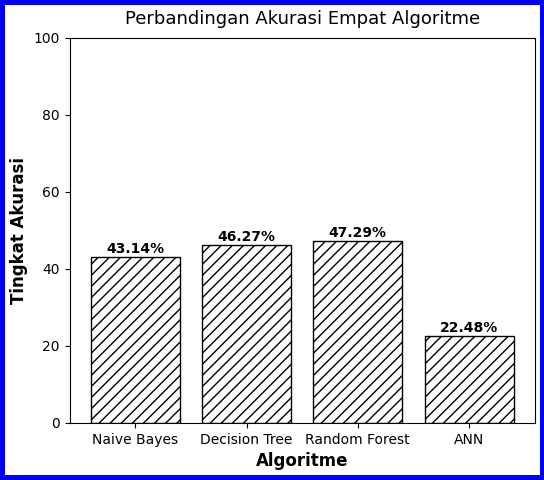

In [30]:
model_names = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'ANN']
accuracy_values = [43.14, 46.27, 47.29, 22.48]

plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, accuracy_values, color='white', edgecolor='black', hatch='///')

for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{acc:.2f}%", ha='center', fontsize=10, fontweight='bold')

plt.ylim(0, 100)
plt.ylabel("Tingkat Akurasi", fontsize=12, fontweight='bold')
plt.xlabel("Algoritme", fontsize=12, fontweight='bold')
plt.title("Perbandingan Akurasi Empat Algoritme", fontsize=13, pad=10)

plt.gca().set_facecolor('white')
plt.grid(False)
plt.gcf().patch.set_edgecolor('blue')
plt.gcf().patch.set_linewidth(6)

plt.show()

# **PERBANDINGAN NILAI PRECISION**

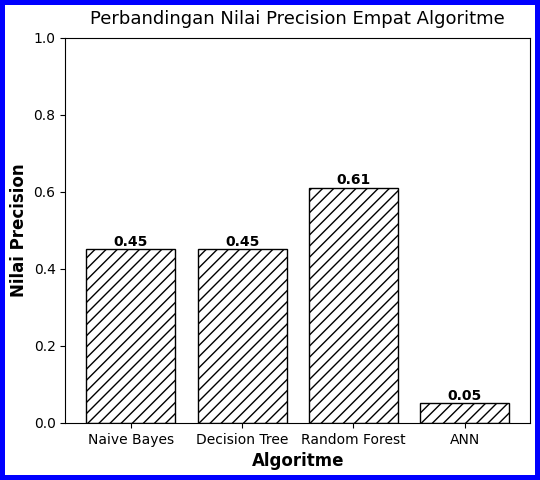

In [31]:
precision_values = [0.45, 0.45, 0.61, 0.05]

plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, precision_values, color='white', edgecolor='black', hatch='///')

for bar, val in zip(bars, precision_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.ylim(0, 1)
plt.ylabel("Nilai Precision", fontsize=12, fontweight='bold')
plt.xlabel("Algoritme", fontsize=12, fontweight='bold')
plt.title("Perbandingan Nilai Precision Empat Algoritme", fontsize=13, pad=10)

plt.gca().set_facecolor('white')
plt.grid(False)
plt.gcf().patch.set_edgecolor('blue')
plt.gcf().patch.set_linewidth(6)

plt.show()

# **PERBANDINGAN NILAI RECALL**

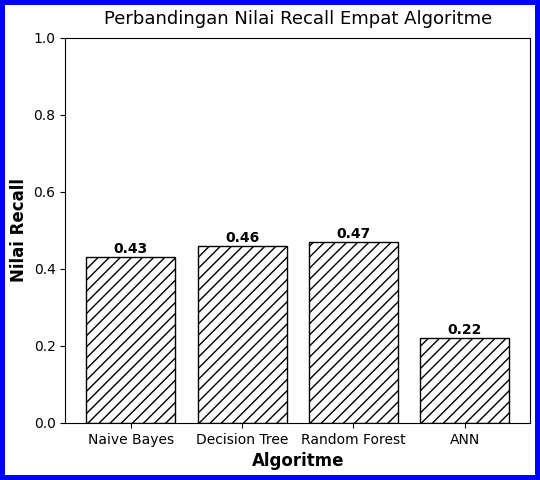

In [32]:
recall_values = [0.43, 0.46, 0.47, 0.22]

plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, recall_values, color='white', edgecolor='black', hatch='///')

for bar, val in zip(bars, recall_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.ylim(0, 1)
plt.ylabel("Nilai Recall", fontsize=12, fontweight='bold')
plt.xlabel("Algoritme", fontsize=12, fontweight='bold')
plt.title("Perbandingan Nilai Recall Empat Algoritme", fontsize=13, pad=10)

plt.gca().set_facecolor('white')
plt.grid(False)
plt.gcf().patch.set_edgecolor('blue')
plt.gcf().patch.set_linewidth(6)

plt.show()

# **PERBANDINGAN NILAI F1-SCORE**

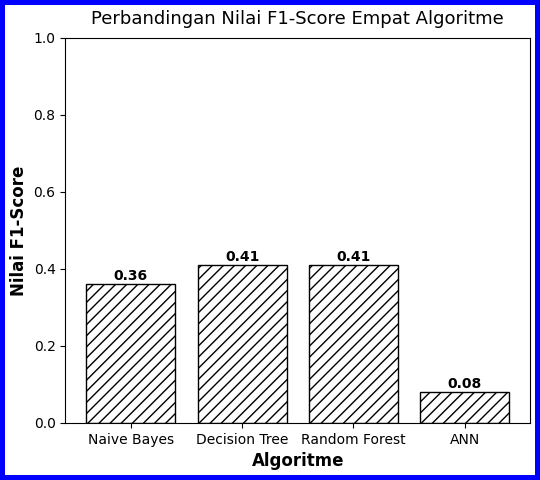

In [33]:
f1_values = [0.36, 0.41, 0.41, 0.08]

plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, f1_values, color='white', edgecolor='black', hatch='///')

for bar, val in zip(bars, f1_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.ylim(0, 1)
plt.ylabel("Nilai F1-Score", fontsize=12, fontweight='bold')
plt.xlabel("Algoritme", fontsize=12, fontweight='bold')
plt.title("Perbandingan Nilai F1-Score Empat Algoritme", fontsize=13, pad=10)

plt.gca().set_facecolor('white')
plt.grid(False)
plt.gcf().patch.set_edgecolor('blue')
plt.gcf().patch.set_linewidth(6)

plt.show()

# **HASIL AKHIR 4 MODEL**

In [34]:
# Data hasil akhir dari empat model
data = {
    'Algoritma': ['Naive Bayes', 'Decision Tree', 'Random Forest', 'ANN'],
    'Akurasi (%)': ['43,14 %', '46,27 %', '47,29 %', '22,48 %'],
    'Precision': [0.45, 0.45, 0.61, 0.05],
    'Recall': [0.43, 0.46, 0.47, 0.22],
    'F1-Score': [0.36, 0.41, 0.41, 0.08],
    '(Total Data) Support': [11684, 11684, 11684, 11684],
    'Waktu Eksekusi (s)': ['0.0527 detik', '0.1107 detik', '4.7742 detik', '15.9617 detik']
}

# Membuat DataFrame
df = pd.DataFrame(data)

# **NAMA-NAMA KOLOM PADA TABEL HASIL**

In [35]:
df.columns = [
    "Algoritma",
    "Akurasi (%)",
    "Precision",
    "Recall",
    "F1-Score",
    "Support",
    "Waktu Eksekusi (s)"
]

# **VISUALISASI TABEL**

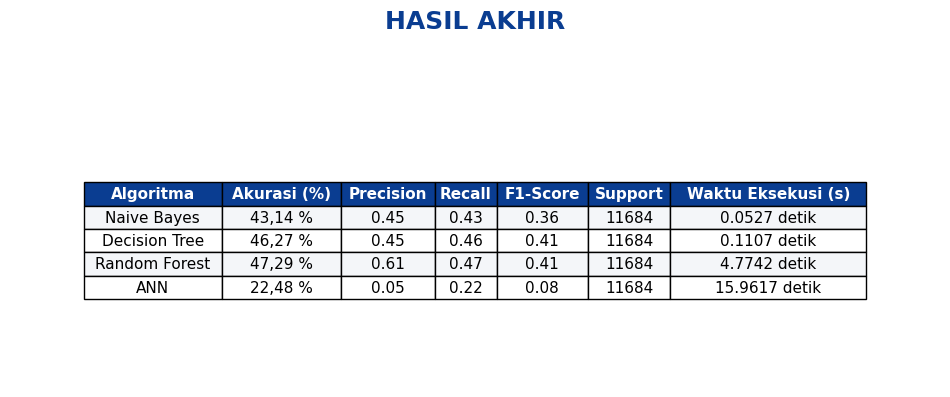

In [36]:
fig, ax = plt.subplots(figsize=(12, 3.8))   # ✅ dibuat lebih lebar agar kolom muat
ax.axis('off')

# Header Judul
plt.text(
    0.5, 1.25, "HASIL AKHIR",
    ha='center', va='center',
    fontsize=18, fontweight='bold', color='#0A3D91'
)

# Membuat tabel
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Mengatur ukuran tulisan & scaling
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.3, 1.4)        # ✅ kolom lebih lebar & tidak rapat

# Mengatur lebar kolom secara manual (BIAR RAPIH)
# Semakin besar angkanya → semakin lebar kolomnya
col_widths = {
    0: 0.16,   # Algoritma
    1: 0.10,   # Akurasi
    2: 0.10,   # Precision
    3: 0.10,   # Recall
    4: 0.10,   # F1-Score
    5: 0.14,   # Support
    6: 0.20    # Waktu Eksekusi
}

for col, width in col_widths.items():
    table.auto_set_column_width(col)   # aktifkan auto width
    table._cells[(0, col)].set_width(width)

# Warna header & body
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_facecolor('#0A3D91')
        cell.set_text_props(color='white', weight='bold')
    else:
        if row % 2 == 0:
            cell.set_facecolor('#FFFFFF')
        else:
            cell.set_facecolor('#F4F6F9')

# Border tabel luar
for pos in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[pos].set_color('#0A3D91')
    plt.gca().spines[pos].set_linewidth(6)

plt.show()